<a href="https://colab.research.google.com/github/dinarakurmangaliyeva/MachineLearning2023Labs/blob/main/Copy_of_ScikitLearn_and_Classification_Intro_and_Exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Lab 2: Introduction to ScikitLearn and Classification Tasks

During this Lab, we aim to achieve the following:


*   familiarize with <a href="https://scikit-learn.org/stable/"> scikit-learn </a>, an essential python library in data science;
*   learn how to approach a classification task with scikit-learn.

In this notebook, we learn to use Scikit-Learn with a practical example and then, in the second part, we will test our knowledge by doing some exercises. We will use version 1.2.2 of Scikit.



In [ ]:
# SETUP
# install python at version 3.10
!apt-get install python3.10

# update symbolic links to the newly installed python version
!ln -sf /usr/bin/python3.10 /usr/bin/python
!ln -sf /usr/bin/python3.10 /usr/bin/python3

# install numpy 1.23.5
%pip install numpy==1.23.5
# install scikit-learn 1.2.2
%pip install scikit-learn==1.2.2

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
python3.10 is already the newest version (3.10.12-1~22.04.2).
0 upgraded, 0 newly installed, 0 to remove and 9 not upgraded.


# Part 1: A Classification Example With Scikit-Learn

We start our lab by implementing the *perceptron* using  scikit-learn.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [ ]:
X_toy, y_toy = datasets.make_blobs(n_samples=150,n_features=2,
                           centers=2,cluster_std=1.05,
                           random_state=123)
y_toy[y_toy==0]=-1

We can now define our classifier: a perceptron <a href="https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Perceptron.html"> [link] </a>.

In [ ]:
from sklearn.linear_model import Perceptron

# we define two peceptrons: one with and one without intercept estimation (our theta_0)
clf1 = Perceptron(fit_intercept = False)
clf2 = Perceptron(fit_intercept = True)

In [ ]:
y_toy

array([-1,  1, -1, -1,  1, -1,  1, -1,  1,  1, -1,  1,  1, -1, -1, -1, -1,
       -1, -1,  1, -1,  1, -1, -1,  1,  1,  1, -1, -1, -1, -1,  1, -1,  1,
        1, -1, -1,  1,  1, -1, -1, -1, -1,  1, -1,  1,  1, -1,  1,  1,  1,
        1,  1,  1,  1,  1, -1, -1, -1,  1,  1,  1,  1, -1,  1,  1,  1, -1,
       -1,  1,  1, -1,  1, -1, -1, -1, -1, -1, -1, -1,  1, -1,  1, -1,  1,
       -1,  1, -1,  1,  1, -1, -1, -1, -1, -1,  1,  1, -1,  1, -1, -1,  1,
        1, -1,  1, -1,  1, -1, -1,  1, -1, -1,  1, -1, -1, -1, -1, -1,  1,
        1, -1,  1,  1, -1,  1,  1,  1,  1,  1,  1, -1,  1, -1,  1, -1,  1,
       -1,  1, -1,  1,  1, -1, -1,  1,  1,  1, -1,  1,  1,  1])

Sklearn defines standard functions for models, like *fit* and *predict*.

In [ ]:
#train phase
clf1.fit(X_toy, y_toy)
clf2.fit(X_toy, y_toy)

#estimation (y_hat)
y_pred_clf1 = clf1.predict(X_toy)
y_pred_clf2 = clf2.predict(X_toy)


How to evaluate our models' performance? <br>
Scikit-learn offers a broad set of evaluation functions already implemented <a href = "https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics">[link]</a>.

In [ ]:
from sklearn.metrics import accuracy_score

print(f"CLF1 -- no intercept.\tACC: {accuracy_score(y_toy, y_pred_clf1)}")
print(f"CLF2 -- with intercept.\tACC: {accuracy_score(y_toy, y_pred_clf2)}")

CLF1 -- no intercept.	ACC: 1.0
CLF2 -- with intercept.	ACC: 1.0


## Model Selection
When defining or training a model, we have the so called *hyperparameters*, i.e., different settings to configure for our training strategy.  <br>
The question is: *how can we decide the best configuration setting for the task?* <br>
The answer is the usage of *training* and *validation* partitions. <br>
We can use sklearn to do that: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html.

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X_toy, y_toy,
                                                  train_size = 0.8, random_state = 123)

print(f"Original size = {X_toy.shape[0]}\tTrain size = {X_train.shape[0]}\tVal size = {X_val.shape[0]}")  # alternative way to use the print when there are
                                                                                                          # variables and text to print together

Original size = 150	Train size = 120	Val size = 30


In [ ]:
X_train

array([[ 5.26004729e+00, -3.92781007e+00],
       [-4.79523109e+00,  1.32512856e+00],
       [ 3.21655325e+00, -4.37665772e+00],
       [ 6.12085274e+00, -4.10455001e+00],
       [-5.03973067e+00,  2.57182122e+00],
       [ 4.51375985e+00, -4.49989743e+00],
       [-4.76403482e+00,  8.29512940e-02],
       [ 5.98676562e+00, -6.40351135e+00],
       [ 3.90352643e+00, -4.24136407e+00],
       [-4.88142195e+00,  4.69087094e-01],
       [-5.20050249e+00,  3.27213956e-03],
       [ 3.66098337e+00, -7.21573186e+00],
       [-6.24082539e+00,  1.10284799e+00],
       [-6.53360875e+00,  1.20263479e+00],
       [ 3.11803956e+00, -3.44260750e+00],
       [ 6.44136724e+00, -3.84365553e+00],
       [ 3.59888766e+00, -5.41741082e+00],
       [-5.82129573e+00,  7.97451806e-01],
       [-7.48287244e+00,  1.75687207e+00],
       [-5.15755282e+00,  1.31994119e+00],
       [ 3.97714830e+00, -4.52195997e+00],
       [ 3.08374887e+00, -6.09126627e+00],
       [-5.46940739e+00,  8.59087912e-01],
       [-4.

# Part 2: Exercises

### Ex 2.1 Logistic Regression

**Ex 2.1.1** Use Scikit-Learn to train a <a href="https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html">Logistic Regression</a> classifier with default parameters over the previously defined dataset (Lab introduction). <br>
Compute the accuracy in both training and validation sets.

In [ ]:
from math import lgamma
#
# Ex 2.1.1: complete here
#
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(random_state=123).fit(X_train, y_train)

lg_predict_val = clf.predict(X_val)
lg_predict_train = clf.predict(X_train)


print(f"CLF1 -- no intercept.\tACC: {accuracy_score(y_val, lg_predict_val)}")
print(f"CLF1 -- no intercept.\tACC: {accuracy_score(y_train, lg_predict_train)}")


CLF1 -- no intercept.	ACC: 1.0
CLF1 -- no intercept.	ACC: 1.0


### Ex 2.2 Logistic Regression (2)

We ask you again to work on a classification task. <br>
This time, the classification is more challenging.
The dataset is called *sonar*.

In [ ]:
import pandas as pd
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/sonar.csv'
ds = pd.read_csv(url, header = None)

# split into input and output elements
data = ds.values
X_sonar, y_sonar = data[:, :-1], data[:, -1]

**EX 2.2.1** Print the shapes of our arrays $X$ and $y$.

In [ ]:
#
# Ex 2.2.1: complete here
#
print(X_sonar.shape)
print(y_sonar.shape)

(208, 60)
(208,)


It's time to partition our dataset. <br>
We ask you to create three partitions:


*   *train set* : a set of samples used to train a model.
*   *val set*: a set of samples used to decide the best model.
*   *test set*: a set of samples used to see our best model performance.

We now first split samples that we can use in our training (train and val), from samples that we cannot touch (test). <br>
**EX 2.2.2** Create a split between train_val and test, by maintaining the 25% of samples in the test set.

In [ ]:
#
# Ex 2.2.2: complete here
#
X_train_val, X_test, y_train_val, y_test = train_test_split(X_sonar, y_sonar,
                                                  train_size = 0.75, random_state = 123)
print(f"Original size = {X_sonar.shape[0]}\tTrainval size = {X_train_val.shape[0]}\tTest size = {X_test.shape[0]}")

Original size = 208	Trainval size = 156	Test size = 52


**EX 2.2.3** From the train_val variables, split train and validation sets. Maintain the 10% of samples in the validation.


In [ ]:
#
# Ex 2.2.3: complete here
#
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val,
                                                  train_size = 0.90, random_state = 123)
print(f"Original size = {X_train_val.shape[0]}\tTrain size = {X_train.shape[0]}\tVal size = {X_val.shape[0]}")

Original size = 156	Train size = 140	Val size = 16


In [ ]:
print(X_train.shape, X_val.shape, X_test.shape)

(140, 60) (16, 60) (52, 60)


In [ ]:
X_train.shape

(140, 60)

Sklearn uses a different name for the hyperparameter $\lambda$, can you recognise it in the documentation from its description? What is the default value for the parameter? What is its relationship with $\lambda$?

**EX 2.2.4** Train and evaluate (using accuracy) a logistic regression with the default value for the hyperparameter. Do the evaluation **only** on the training and validation partitions.

In [ ]:
#
# Ex 2.2.4: complete here
#
clf_sonar = LogisticRegression(random_state=123).fit(X_train, y_train)

sonar_predict_train = clf_sonar.predict(X_train)
sonar_predict_val = clf_sonar.predict(X_val)

print(f"CLF1 -- no intercept.\tACC: {accuracy_score(y_val, sonar_predict_val)}")
print(f"CLF1 -- no intercept.\tACC: {accuracy_score(y_train, sonar_predict_train)}")



CLF1 -- no intercept.	ACC: 0.75
CLF1 -- no intercept.	ACC: 0.8714285714285714


This time we do not reach the 100% of accuracy in both training and validation set. <br>
A good strategy is to apply a grid-search, i.e., find a sub-optimal hyperparameters. <br>
We now ask you to manually implement a grid-search for *C*, an hyperparameter of the model. <br>
See the documentation <a href="https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html"> [link] </a>. <br>
**EX 2.2.5**  We ask you to find the best *C* among the following: $C = [0.001, 0.01, 0.1, 1., 10]$.

In [ ]:
#
# Ex 2.2.5: complete here
#
C = [0.001, 0.01, 0.1, 1., 10, 100]

In [ ]:
for c in C:
  clf_sonar = LogisticRegression(C=c, max_iter=200)
  clf_sonar.fit(X_train, y_train)

  y_train_pred = clf_sonar.predict(X_train)
  y_val_pred = clf_sonar.predict(X_val)
  train_acc = accuracy_score(y_train,y_train_pred)
  val_acc = accuracy_score(y_val, y_val_pred)

  print(f"LR. C= {c}.\tTrain ACC: {train_acc}\tVal Acc: {val_acc}")

LR. C= 0.001.	Train ACC: 0.55	Val Acc: 0.3125
LR. C= 0.01.	Train ACC: 0.5857142857142857	Val Acc: 0.3125
LR. C= 0.1.	Train ACC: 0.75	Val Acc: 0.5
LR. C= 1.0.	Train ACC: 0.8714285714285714	Val Acc: 0.75
LR. C= 10.	Train ACC: 0.8785714285714286	Val Acc: 0.75
LR. C= 100.	Train ACC: 0.9357142857142857	Val Acc: 0.75


**Ex 2.2.6** The default parameter seems to work fine. <br>
We might want to extend the search in a smaller range: $C=[0.1, 0.5, 1, 5, 10, 15, 20] $

In [ ]:
#
# Ex 2.2.6: complete here
#
C=[0.1, 0.5, 1, 5, 10, 15, 20]
for c in C:
  clf_sonar = LogisticRegression(C=c, max_iter=200)
  clf_sonar.fit(X_train, y_train)

  y_train_pred = clf_sonar.predict(X_train)
  y_val_pred = clf_sonar.predict(X_val)
  train_acc = accuracy_score(y_train,y_train_pred)
  val_acc = accuracy_score(y_val, y_val_pred)

  print(f"LR. C= {c}.\tTrain ACC: {train_acc}\tVal Acc: {val_acc}")

LR. C= 0.1.	Train ACC: 0.75	Val Acc: 0.5
LR. C= 0.5.	Train ACC: 0.8428571428571429	Val Acc: 0.6875
LR. C= 1.	Train ACC: 0.8714285714285714	Val Acc: 0.75
LR. C= 5.	Train ACC: 0.8714285714285714	Val Acc: 0.75
LR. C= 10.	Train ACC: 0.8785714285714286	Val Acc: 0.75
LR. C= 15.	Train ACC: 0.8928571428571429	Val Acc: 0.75
LR. C= 20.	Train ACC: 0.9	Val Acc: 0.75


There is no much difference, but we find sub-optimal values with $C= [1, 5, 10, 15, 20$]. <br>
Note that while the training performance vary, the validation set is the same between these five values.   

In the official documentation, we find several hyperparameters we can tune. <br>
For example, you might want to see what happen when we do not fit the intercept. To do so, we should try both combinations (i.e., true and false) for the parameters, but by combining all the possible C we found up to now. <br>
Since we use 7 possible values for $C$ and 2 for *fit\_intercept*, the total number of trials are $7 * 2 = 14$. <br>
Python-related speaking, this is translated into an inner loop, i.e., a loop inside a loop:

    for c in [0.1, 0.5, 1, 5, 10, 15, 20]:
        for fi in [True, False]:
            #here we train and test our model

If we want to find the sub-optimal among three hyper-parameters, we must add another innner loop. If we have 10 hyper-parameters, we'll have 10 inner loops! <br>
For now, we can do it manually.

**Ex 2.2.7** Find the sub-optimal values using the validation performance.

In [ ]:
#
# Ex 2.2.7: complete here
#

C=[0.1, 0.5, 1, 5, 10, 15, 20]
FI = [True, False]
best_C = None
best_fi = None
best_train_acc=0.
best_val_acc = 0.


for c in C:
  for fi in FI:
    clf_sonar = LogisticRegression(C=c, fit_intercept=fi)
    clf_sonar.fit(X_train, y_train)

    y_train_pred = clf_sonar.predict(X_train)
    y_val_pred = clf_sonar.predict(X_val)
    train_acc = accuracy_score(y_train,y_train_pred)
    val_acc = accuracy_score(y_val, y_val_pred)

    if val_acc>best_val_acc:
      best_C = c
      best_fi = fi
      best_train_acc = train_acc
      best_val_acc = val_acc
print(f"Found the best model with C:{best_C}\tFit Intercept:{best_fi}")
print(f"Best training acc:{best_train_acc}\tBest val acc:{best_val_acc}")


Found the best model with C:1	Fit Intercept:True
Best training acc:0.8714285714285714	Best val acc:0.75


We don't get much improvement, We don't get much improvement, these are the same parameter values of the "defaul" Logistic Regression model. Don't worry about it, it just a toy-sh dataset. During the next weeks we are going to see more realistic tasks where a proper parameter selection can make the difference.

# Ex 2.3 Grid Search Cross-Validation

In the previous exercise, we implemented a grid search manually. <br>
The more hyper-parameters, the harder to implement. <br>
Scikit-learn eases our pain, and it offers a grid-search cross-validation function that does everything for us! <a href="https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html"> [link]</a>.<br>
We now see together an example of grid-search implementation.

In [ ]:
from sklearn.model_selection import GridSearchCV #import the library

The first thing to do is to define a dictionary containing the hyper-parameters with the range of values we want to search on.

In [ ]:
param_grid_test = {
    'C': [0.1, 0.5, 1, 5, 10, 15, 20],
    'fit_intercept': [True, False]
}

Then, we create the grid-search object.

In [ ]:
#target classifier
lr = LogisticRegression()

#grid-search object
clf = GridSearchCV(estimator= lr, param_grid=param_grid_test,
                   cv = 5, scoring = "accuracy")

Finally, we can find the best model. <br>
Note that the tool already refit the best fund model in the entire dataset (i.e., train and validation). <br>
This is a default parameter of the grid-search CV (see the documentation).


In [ ]:
#fit the model
clf.fit(X_toy, y_toy) #we do not use the train - validation split strategy since it is included in the CV procedure

#see the best parameters and performance
print(clf.best_params_)
print(clf.best_score_)


{'C': 0.1, 'fit_intercept': True}
1.0


**Ex 2.3.1** Now it is your time. Implement a grid-search CV with 10 fold for the *sonar* dataset.

In [ ]:
#
# Ex 2.3.1: complete here
#
param_grid = {
    'C': [0.1, 0.5, 1, 5, 10, 15, 20],
    'fit_intercept': [True, False]
}
#target classifier
lr = LogisticRegression(max_iter=200)

#grid-search object
clf = GridSearchCV(estimator= lr, param_grid=param_grid_test,
                   cv = 10, scoring = "accuracy")
clf.fit(X_train_val, y_train_val) #we do not use the train - validation split strategy since it is included in the CV procedure

#see the best parameters and performance
print(clf.best_params_)
print(clf.best_score_)

{'C': 15, 'fit_intercept': False}
0.7883333333333333


you should see the following warning:

    *ConvergenceWarning: lbfgs failed to converge (status=1): STOP: TOTAL NO. of ITERATIONS REACHED LIMIT*

**Ex 2.3.2** Use the documentation to better understand the nature of the warning.

To fix it, we can set the parameter max_iter=200 in the LogisticRegression. Re-execute the previous code with this new parameter.  

In [ ]:
#
# Ex 2.3.2: complete here
#

The grid-search cv returns a different Logistic Regression model, with $C=15$ and *fit_intercept=False*.  <br>

**Ex 2.3.3** It's time to see this best model on the test set. Use the accuracy as evaluation metric.

In [ ]:
#
# Ex 2.3.3: complete here
#
y_test_pred = clf.predict(X_test)
print(accuracy_score(y_test, y_test_pred))

0.7884615384615384


# Ex 2.4: Homemade perceptron

Using already made libraries is nice, they save us a lot of time!
However, it is always interesting to understand their underlying mechanisms.

In this exercise, we try to implement a perceptron using only *numpy*.

In [ ]:
import matplotlib.pyplot as plt
from sklearn import datasets

#let's build a custom dataset
X, y = datasets.make_blobs(n_samples=150,n_features=2,
                           centers=2,cluster_std=1.05,
                           random_state=123)
print(y)

[0 1 0 0 1 0 1 0 1 1 0 1 1 0 0 0 0 0 0 1 0 1 0 0 1 1 1 0 0 0 0 1 0 1 1 0 0
 1 1 0 0 0 0 1 0 1 1 0 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 0 1 1 1 0 0 1 1 0 1 0
 0 0 0 0 0 0 1 0 1 0 1 0 1 0 1 1 0 0 0 0 0 1 1 0 1 0 0 1 1 0 1 0 1 0 0 1 0
 0 1 0 0 0 0 0 1 1 0 1 1 0 1 1 1 1 1 1 0 1 0 1 0 1 0 1 0 1 1 0 0 1 1 1 0 1
 1 1]


As you can see, $y$ labels are $0$ or $1$. Let's turn the zeros into $-1$ to get us into the setting we saw in class

**EX 2.4.1** Modify the $y$ vector such that the labels are $\{-1,  1\}$ instead of $\{0, 1\}$.

In [ ]:
#
# Ex 2.4.1: complete here
#
y[y==0]=-1
print(y)

[-1  1 -1 -1  1 -1  1 -1  1  1 -1  1  1 -1 -1 -1 -1 -1 -1  1 -1  1 -1 -1
  1  1  1 -1 -1 -1 -1  1 -1  1  1 -1 -1  1  1 -1 -1 -1 -1  1 -1  1  1 -1
  1  1  1  1  1  1  1  1 -1 -1 -1  1  1  1  1 -1  1  1  1 -1 -1  1  1 -1
  1 -1 -1 -1 -1 -1 -1 -1  1 -1  1 -1  1 -1  1 -1  1  1 -1 -1 -1 -1 -1  1
  1 -1  1 -1 -1  1  1 -1  1 -1  1 -1 -1  1 -1 -1  1 -1 -1 -1 -1 -1  1  1
 -1  1  1 -1  1  1  1  1  1  1 -1  1 -1  1 -1  1 -1  1 -1  1  1 -1 -1  1
  1  1 -1  1  1  1]


We also plot what the data look like; in particular, we can see two different colours, one per class.

Text(0.5, 1.0, 'Random Classification Data with 2 classes')

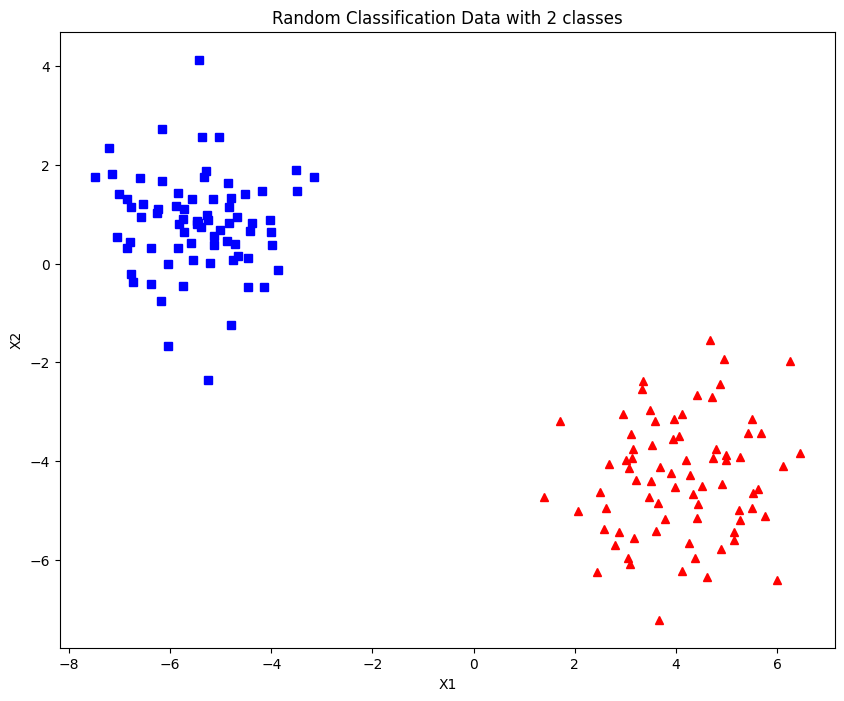

In [ ]:
#Plotting
fig = plt.figure(figsize=(10,8))
plt.plot(X[:, 0][y == -1], X[:, 1][y == -1], 'r^')
plt.plot(X[:, 0][y == 1], X[:, 1][y == 1], 'bs')
plt.xlabel("X1")
plt.ylabel("X2")
plt.title('Random Classification Data with 2 classes')

Let's start to solve our exercise. <br>

**EX 2.4.2** create two variables $m,n$ that represent the number of examples and the number of features, respectively. Get those values from $X$.


In [ ]:
#
# Ex 2.4.2: complete here
#
m,n = X.shape
print(m,n)


150 2


We now create a numpy array $\theta$ that contains the parameters of our perceptron. <br>

**EX 2.4.3** Create a numpy array *theta* filled with zero values (you should be able to determine the correct size). <br>


In [ ]:
#
# Ex 2.4.3: complete the solution here
#
theta =np.zeros((n+1,1))
print(theta,theta.shape)


[[0.]
 [0.]
 [0.]] (3, 1)


Add the *bias* vector to $X$ as well: <br>
**EX 2.4.4** create a new matrix $X_{mat}$ $(m , 3)$, where the first column is set to $1$, the second and third are our $X$.

In [ ]:
#
# Ex 2.4.4: complete the solution here
#
# X_mat =
print(X[:5, :])
X_mat = np.hstack((np.ones((m, 1)), X))
print(X_mat[:5, :])

[[ 6.12085274 -4.10455001]
 [-5.25340971  0.89387172]
 [ 4.60354114 -6.35399563]
 [ 2.48988782 -4.62631234]
 [-5.25610105 -2.36631238]]
[[ 1.          6.12085274 -4.10455001]
 [ 1.         -5.25340971  0.89387172]
 [ 1.          4.60354114 -6.35399563]
 [ 1.          2.48988782 -4.62631234]
 [ 1.         -5.25610105 -2.36631238]]


It's time to train! <br>
**EX 2.4.5** Write a function called *perceptron_v1* that, given $X_{mat}$, $y$ and $\theta$, updates $\theta$ using the **perceptron** algorithm we saw in class during one of the previous lectures. <br>
**Bonus**: we say that one algorithm has run for an epoch once it has seen (considered) all the examples in the training set once. Add a parameter  *max_epochs* to perceptron\_v1 which stops the perceptron if it has not converged (made no error on the training set) after *max_epochs* epochs.  
The function returns the updated $\theta$ vector, and the number of epochs it has been executed.

    #Example of how to return multiple variables
    def example(a, b):
        c = a + b
        d = a * b
        e = a / b
        f = a - b
        return c, d, e, f
    
    c, d, e, f = example(1, 2)


In [ ]:
#
# Ex 2.4.5: complete the solution here
#print(X[:5, :])
def perceptron_v1(X_mat, y, theta, max_epochs):

  m = X_mat.shape[0] # number of examples in the training set
  num_epochs = 0
  num_errors = 1
  while num_epochs <= max_epochs and num_errors > 0: # we keep iterating over the data until
                                                       # we make no mistake or we reach the maximum number of iterations
    num_epochs = num_epochs + 1
    num_errors = 0
    for i in range(m):
      #get the current sample
      X_i = X_mat[i, :].reshape(1, 3)# @ (3, 1) = (1, 1) ~ real value
      y_i = y[i]
      y_hat = X_i.dot(theta)
      #predict the label of the ith-example
      if y_hat * y_i <= 0:
        theta += y_i*X_i.T # the prediction is wrong, we update the theta
        num_errors = num_errors + 1
  return theta, num_epochs



theta, num_epochs = perceptron_v1(X_mat, y, theta, 30)
print(theta)



[[-1.        ]
 [-6.12085274]
 [ 4.10455001]]


Now write a function _perceptron_predict_ that computes the predictions of a trained Perceptron on a dataset, returning a vector (list) of {-1,1} values. The parameters of the function are the dataset and the theta values.
Finally, apply _perceptron_predict_ to (X_mat, theta):
```
y_pred = perceptron_predict(X_mat, theta)
```

In [ ]:
#
# Ex 2.4.5 part 2: complete the solution here
#
def perceptron_predict(X_mat, theta):
  y_pred = []
  for i in range(X_mat.shape[0]):
    score = X_mat[i,:].dot(theta)
    if score>0:
      y_pred.append(1)
    else:
      y_pred.append(-1)
  return y_pred


def perceptron_predict_v2(X_mat, theta): # this version uses matrix notation
  y_pred = X_mat.dot(theta)
  y_pred[y_pred>0] = 1
  y_pred[y_pred<=0] = -1
  return y_pred.flatten() # numpy treats differently matrices of dimension (n,1) and vectors of size n;
                          # here y_pred is a matrix - if you type y_pred.shape before applying flatten you get (150,1) -  but
                          # we want to convert it to a vector - if you type y_pred.shape after flatten you get (150,) -
                          # because we will compare to another vector, y, to compute the accuracy of the perceptron.

y_pred = perceptron_predict(X_mat, theta)


**EX 2.4.6** Define a function called *accuracy_score* that, given the ground truth and a vector of predictions, it returns the accuracy score. <br>
We define the accuracy as the number of correct predictions, divided by the total number of predictions. <br>
Calculate the accuracy score of the previous perceptron execution.

In [ ]:
#
# Ex 2.4.6: complete the solution here
#

# Expected output of the command
# print(accuracy_score(y, y_pred))
def accuracy_score(y_true, y_pred):
    return np.sum(y_true == y_pred) / len(y_true)

print(accuracy_score(y,y_pred))


1.0


Good job! We can finally plot the decision boundary obtained so far.

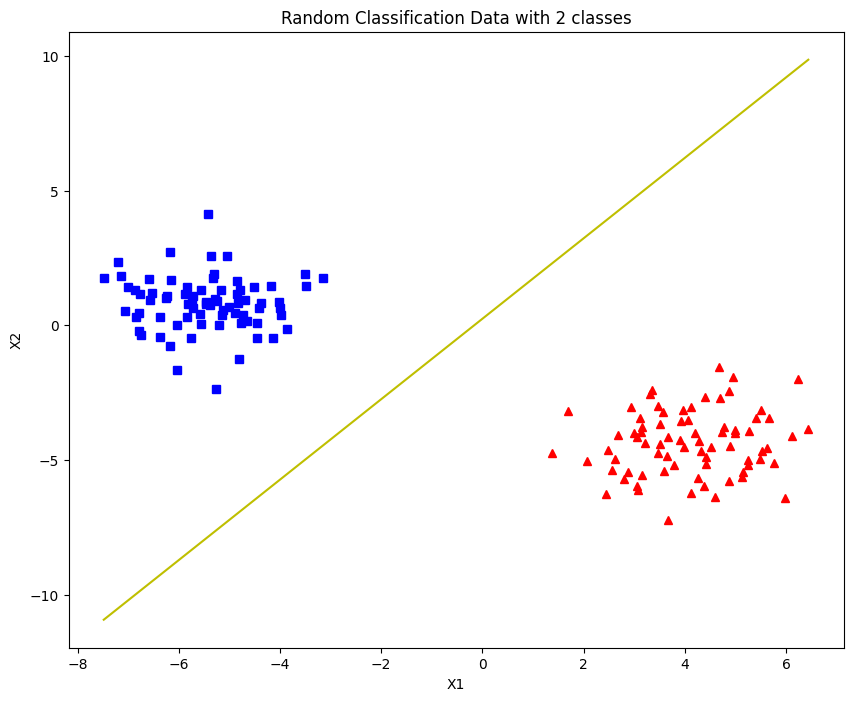

In [ ]:
#Plotting
fig = plt.figure(figsize=(10,8))
plt.plot(X[:, 0][y == -1], X[:, 1][y == -1], 'r^')
plt.plot(X[:, 0][y == 1], X[:, 1][y == 1], 'bs')
plt.xlabel("X1")
plt.ylabel("X2")
plt.title('Random Classification Data with 2 classes')

# ADD THE DECISION BOUNDARY
# The Line is y=mx+c
x1 = np.array([min(X[:,0]), max(X[:,0])])
m = -theta[1]/theta[2]
c = -theta[0]/theta[2]
x2 = m * x1 + c
plt.plot(x1, x2, 'y-')